### import Necessary libraries

In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

### merge the 12 months of sales data into one

In [4]:
all_months = sorted(glob(r'C:\Users\Options\Desktop\py3\SalesAnalysis\Sales_Data\Sales_*_*.csv'))
#all_months

all_months_data = pd.concat((pd.read_csv(file) for file in all_months))
all_months_data.head()                     

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### exploare the data

In [5]:
all_months_data.shape

(186850, 6)

In [6]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


# clean up the data

In [8]:
nan_df = all_months_data[all_months_data.isna().any(axis=1)]
#nan_df
all_months_data=all_months_data.dropna(how = 'all')
all_months_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### add month column

In [9]:
all_months_data['month']=all_months_data['Order Date'].str[1:2]


### convert month data type

In [10]:
all_months_data['month']=all_months_data['month'].astype('int64')
all_months_data.info()

ValueError: invalid literal for int() with base 10: 'r'

### find r specific to conversion problem and remove it

In [11]:
all_months_data = all_months_data[all_months_data['Order Date'].str[1:2] !='r' ]
all_months_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
2050,143177,Wired Headphones,1,11.99,01/12/19 22:01,"983 12th St, San Francisco, CA 94016",1
19981,314756,USB-C Charging Cable,1,11.95,12/08/19 01:12,"793 9th St, San Francisco, CA 94016",2
10525,232981,AAA Batteries (4-pack),2,2.99,07/11/19 19:37,"366 13th St, Seattle, WA 98101",7
501,162480,USB-C Charging Cable,1,11.95,03/23/19 13:01,"597 12th St, San Francisco, CA 94016",3
4915,300338,Lightning Charging Cable,1,14.95,12/19/19 15:41,"479 Hickory St, Dallas, TX 75001",2


### add a sales column

In [12]:
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'])
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])

In [13]:
all_months_data['sales'] = all_months_data['Quantity Ordered'] * all_months_data['Price Each']

In [14]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   month             185950 non-null  object 
 7   sales             185950 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 12.8+ MB


all_months_data

# add city column

In [15]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### what was the best month for sales? and how much earned that month?

In [16]:
all_months_data['month'].value_counts()

2    36959
1    27282
0    20282
4    18279
5    16566
3    15153
7    14293
6    13554
8    11961
9    11621
Name: month, dtype: int64

In [17]:
all_months_data.groupby(['month']).sum()


,Quantity Ordered,Price Each,sales
month,,,
0,22703,3715554.83,3736726.88
1,30701,4992369.06,5021859.93
2,41563,6777300.13,6815465.76
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88


# representing the data with digrams

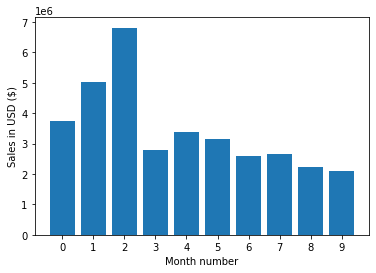

In [18]:

months = range(0,10)

plt.bar(months,all_months_data.groupby(['month']).sum()['sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

# What city sold the most product?


In [19]:
all_months_data.groupby(['City']).sum()


,Quantity Ordered,Price Each,sales
City,,,
Atlanta (GA),16602,2779908.20,2795498.58
Austin (TX),11153,1809873.61,1819581.75
Boston (MA),22528,3637409.77,3661642.01
Dallas (TX),16730,2752627.82,2767975.40
Los Angeles (CA),33289,5421435.23,5452570.80
New York City (NY),27932,4635370.83,4664317.43
Portland (ME),2750,447189.25,449758.27
Portland (OR),11303,1860558.22,1870732.34
San Francisco (CA),50239,8211461.74,8262203.91


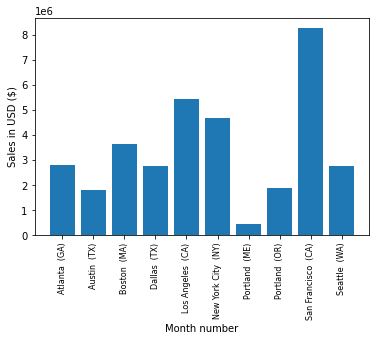

In [20]:
cities = [city for city, df in all_months_data.groupby(['City'])]

plt.bar(cities,all_months_data.groupby(['City']).sum()['sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(cities, rotation='vertical', size=8)
plt.show()